# Método de tendência linear de Holt

Utilizando modelo de suavização exponencial com tendência linear de Holt para prever preço do óleo na Arabia Saudita

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo Excel

In [2]:
dados = pd.read_csv('BrentOilPrices.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])

* Definindo ano como índice

In [5]:
dados = dados.set_index('Date')

* Graficando série temporal

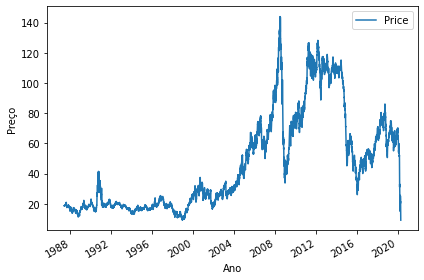

In [6]:
dados.plot()
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.tight_layout()

* Criando amostras de treino e teste

In [7]:
t_treino = dados[dados.index<'2016-01-01'].index.values
t_teste = dados[dados.index>='2016-01-01'].index.values
X_treino = dados[dados.index<'2016-01-01'].values
X_teste = dados[dados.index>='2016-01-01'].values

* Aplicando modelo Exponential Smoothing

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing

In [10]:
fit1 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
fit1 = fit1.forecast(len(X_teste))

fit2 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.3)
fit2 = fit2.forecast(len(X_teste))

fit3 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.5)
fit3 = fit3.forecast(len(X_teste))

fit4 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)
fit4 = fit4.forecast(len(X_teste))

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-10-5155d978c7ce>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
<ipython-input-10-5155d978c7ce>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.3)
<ipython-input-10-5155d978c7ce>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit3 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.5)
<ipython-input-10-5155d978c7ce>:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)


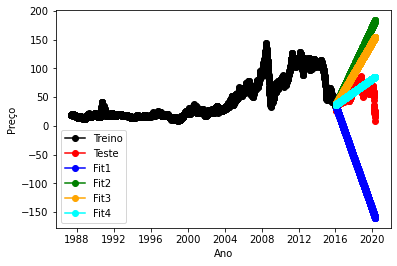

In [11]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit1, marker='o', color='blue',label='Fit1')
plt.plot(t_teste,fit2, marker='o', color='green',label='Fit2')
plt.plot(t_teste,fit3, marker='o', color='orange',label='Fit3')
plt.plot(t_teste,fit4, marker='o', color='cyan',label='Fit4')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

In [12]:
fit4a = Holt(X_treino).fit(smoothing_level = 0.1,smoothing_slope = 0.7)
fit4a = fit4a.forecast(len(X_teste))

fit4b = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)
fit4b = fit4b.forecast(len(X_teste))

fit4c = Holt(X_treino).fit(smoothing_level = 0.5,smoothing_slope = 0.7)
fit4c = fit4c.forecast(len(X_teste))

fit4d = Holt(X_treino).fit(smoothing_level = 0.7,smoothing_slope = 0.7)
fit4d = fit4d.forecast(len(X_teste))

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-12-b013928520c0>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4a = Holt(X_treino).fit(smoothing_level = 0.1,smoothing_slope = 0.7)
<ipython-input-12-b013928520c0>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4b = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)
<ipython-input-12-b013928520c0>:7: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4c = Holt(X_treino).fit(smoothing_level = 0.5,smoothing_slope = 0.7)
<ipython-input-12-b013928520c0>:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4d = Holt(X_treino).fit(smoothing_level = 0.7,smoothing_slope = 0.7)


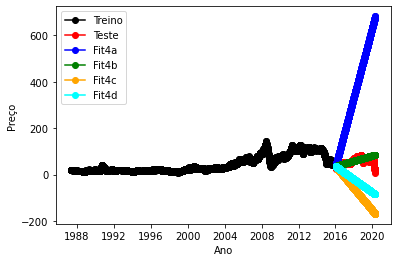

In [13]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit4a, marker='o', color='blue',label='Fit4a')
plt.plot(t_teste,fit4b, marker='o', color='green',label='Fit4b')
plt.plot(t_teste,fit4c, marker='o', color='orange',label='Fit4c')
plt.plot(t_teste,fit4d, marker='o', color='cyan',label='Fit4d')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

* Calculando erros

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
MSE_fit4a = mean_squared_error(X_teste,fit4a)
MSE_fit4b = mean_squared_error(X_teste,fit4b)
MSE_fit4c = mean_squared_error(X_teste,fit4c)
MSE_fit4d = mean_squared_error(X_teste,fit4d)

In [16]:
RMSE_fit4a = np.sqrt(MSE_fit4a)
RMSE_fit4b = np.sqrt(MSE_fit4b)
RMSE_fit4c = np.sqrt(MSE_fit4c)
RMSE_fit4d = np.sqrt(MSE_fit4d)

In [17]:
print("RMSE (SL=0.1) = {:0.2f}".format(RMSE_fit4a))
print("RMSE (SL=0.3) = {:0.2f}".format(RMSE_fit4b))
print("RMSE (SL=0.5) = {:0.2f}".format(RMSE_fit4c))
print("RMSE (SL=0.7) = {:0.2f}".format(RMSE_fit4d))

RMSE (SL=0.1) = 351.56
RMSE (SL=0.3) = 14.36
RMSE (SL=0.5) = 140.60
RMSE (SL=0.7) = 92.48


In [18]:
best = 1e6
i_best = 0
j_best = 0
for i in range(1,10):
    for j in range(50,90):
        ind1 = i/10
        ind2 = j/100
        fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)
        fit_final = fit_final.forecast(len(X_teste))
        MSE = mean_squared_error(X_teste,fit_final)
        RMSE = np.sqrt(MSE)
        if(RMSE<best):
            best = RMSE
            i_best = ind1
            j_best = ind2
        print("SS= {}, SL={}, RMSE={}".format(i_best,j_best,RMSE))

print("Melhor smoothing_level = {}".format(i_best/10.0))
print("Melhor smoothing_slope = {}".format(j_best/100))

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=79.20720260215218


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=92.69164963577683


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=105.86669640487075


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=118.72840494827123


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=131.30303615185883


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=143.64088368178363


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=155.8108004187976


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=167.8948806202646


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=179.9832565930797


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=192.16912793106164


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=204.544174529566


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=217.19448756376352


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=230.19711627522844


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=243.61728630079807


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=257.50630376275967


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=271.9001218351044


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=286.81851527504546


/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-18-7bf3a141e307>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)


SS= 0.1, SL=0.5, RMSE=302.2647851822253


KeyboardInterrupt: 

# Melhor ajuste

In [19]:
fit_best = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.74)
fit_best = fit_best.forecast(len(X_teste))

/Users/danilo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-19-abf1703358b5>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit_best = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.74)


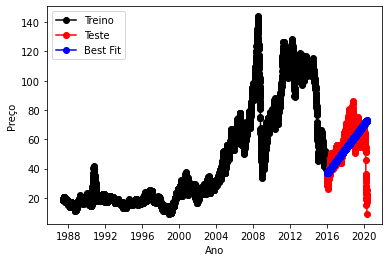

In [20]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit_best, marker='o', color='blue',label='Best Fit')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()